In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loanprediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


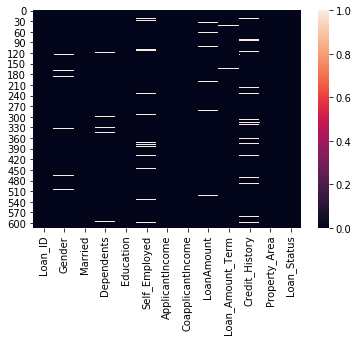

In [5]:
sns.heatmap(df.isnull())

WE CAN SEE SOME DIFFRENT COLOURS IN THE HEATMAP IN DIFFRENT COLUMNS, WE CAN SAY THAT THERE IS ARE SOME MISSING VALUES PRESENT IN THE DATASET

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

NOW LETS REMOVE THE MISSING VALUES BY USING THE IMPUTER FUNCTION

In [8]:
from sklearn.impute import SimpleImputer

In [12]:
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=imp.fit_transform(df['Gender'].values.reshape(-1,1))
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [15]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))
df['Credit_History']=imp.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

NO NULL VALUES LEFT IN THE DATASET AFTER USING IMPUTER FUNCTION

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,Male,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Male,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Male,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Male,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,Male,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [18]:
df.drop(['Loan_ID'],axis=1,inplace=True) # there is no-effect of this Load_ID column on our dataset and the result(target)

In [19]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Male,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Male,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Male,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Male,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,Male,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


NOW AS WE CAN SEE MOST OF THE ATTRIBUTES ARE IN OBJECT FORM(CATAGORICAL FORM) WE HAVE TO CHANGE THEM IN NUMBER FORM SO THAT WE CAN MAKE DATSET EVALUATION

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'].astype('str'))
df['Married']=le.fit_transform(df['Married'].astype('str'))
df['Dependents']=le.fit_transform(df['Dependents'].astype('str'))
df['Education']=le.fit_transform(df['Education'].astype('str'))
df['Self_Employed']=le.fit_transform(df['Self_Employed'].astype('str'))
df['Property_Area']=le.fit_transform(df['Property_Area'].astype('str'))
df['Loan_Status']=le.fit_transform(df['Loan_Status'].astype('str'))

LETS CHECK THE DATA TYPES OF OUR DATASET TO SEE IF THE ARE CONVERTED FROM CATOGORICA TO NUMBER FORM

In [23]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [24]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,1.000000,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,1.000000,1.000000,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Dependents,0.172914,0.172914,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.045364,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,-0.000525,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.058809,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.082912,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.107930,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.073567,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.012819,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


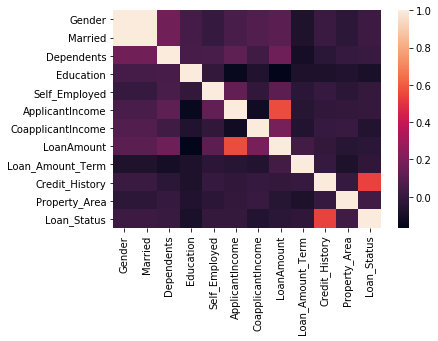

In [25]:
sns.heatmap(df.corr())

HERE FROM THIS HEATMAP WE CAN SEE THAT LIGHT COLOR BOXES ARE HIGHLY CORRELATED AS COMPARED TO THE THE DARK COLOR BOXES

In [26]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


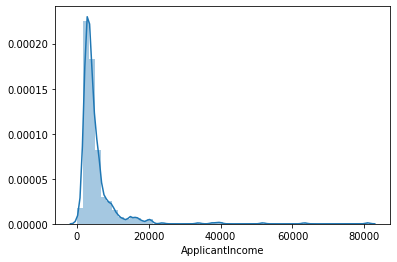

In [70]:
sns.distplot(df['ApplicantIncome'])
plt.show()

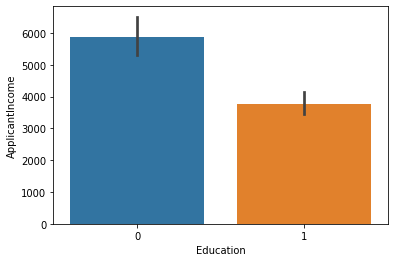

In [27]:
sns.barplot(x='Education',y='ApplicantIncome',data=df)
plt.show()

In [28]:
# 0=Graduate and 1= not Graduate

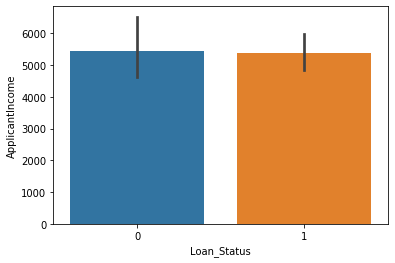

In [31]:
sns.barplot(x='Loan_Status',y='ApplicantIncome',data=df)
plt.show()

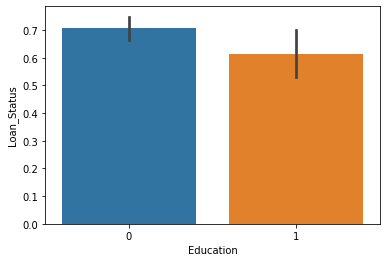

In [32]:
sns.barplot(x='Education',y='Loan_Status',data=df)
plt.show()

In [33]:
# we can clearly notice that probablity of getting a loan is higher for a Graduate individual compared to non-Graduate

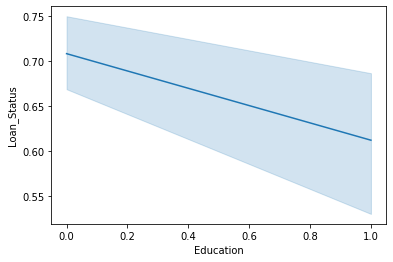

In [34]:
sns.lineplot(x='Education',y='Loan_Status',data=df)
plt.show()

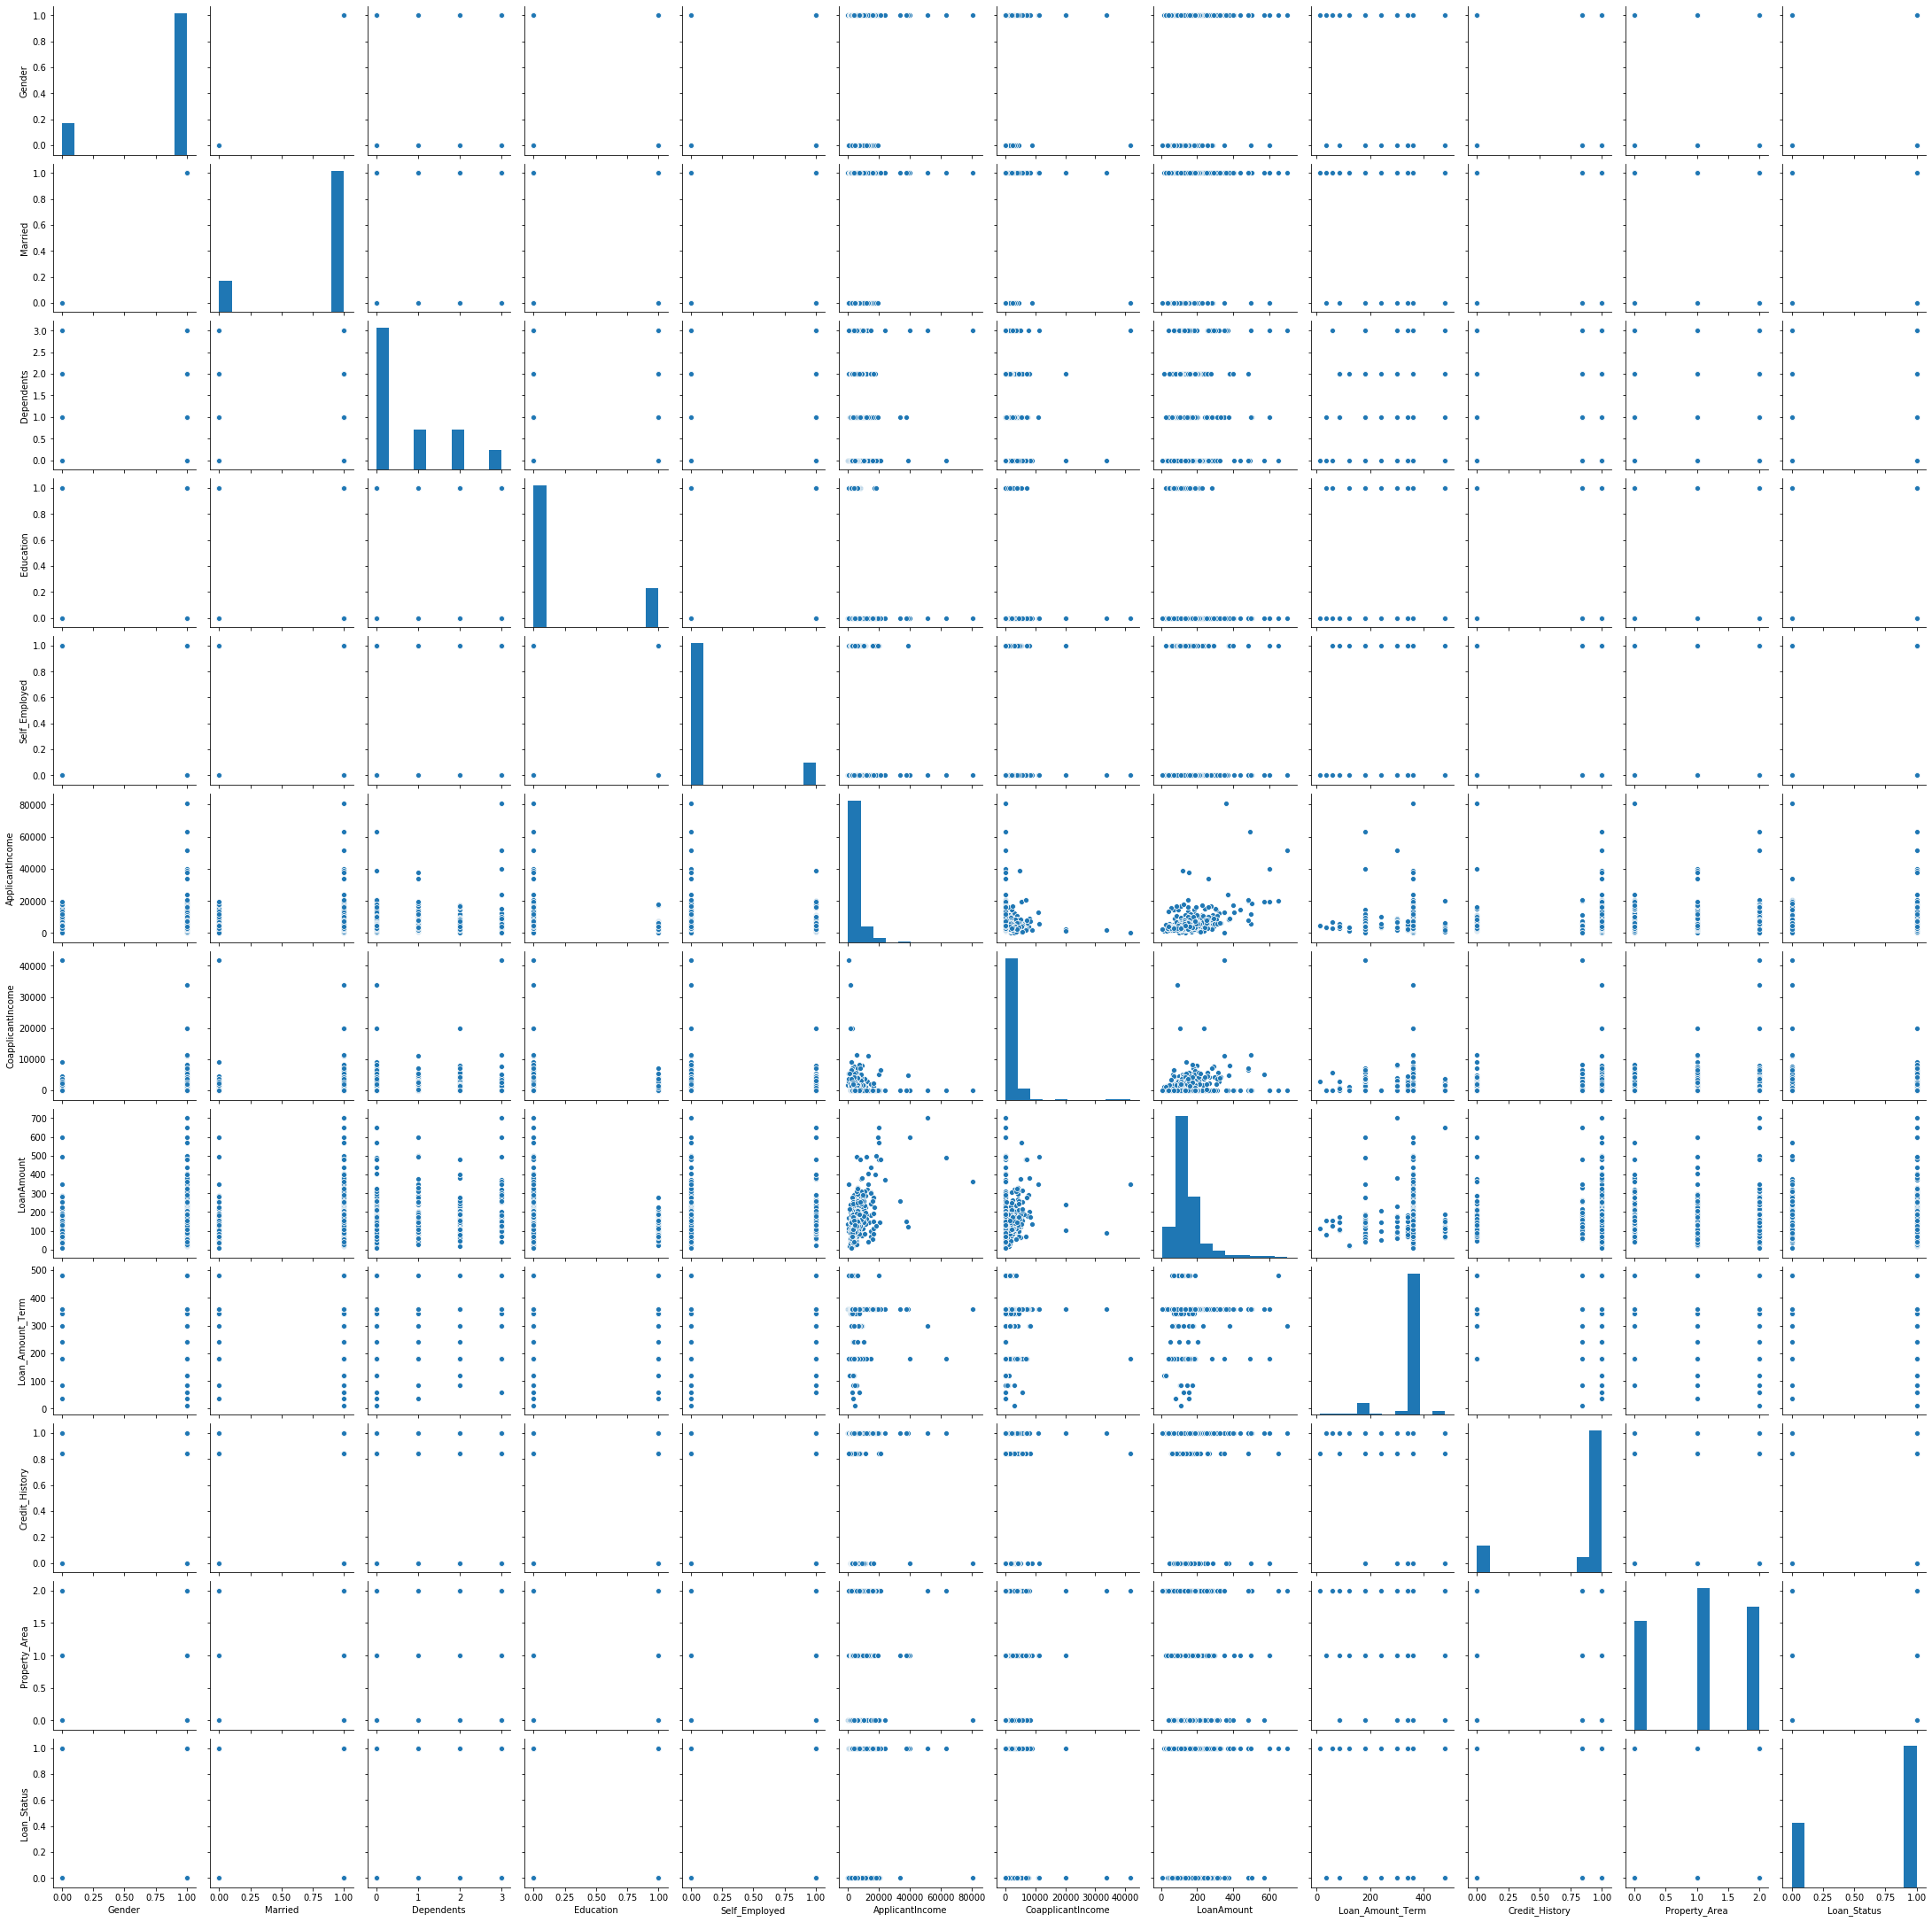

In [35]:
sns.pairplot(df)

In [36]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.817590,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.386497,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [37]:
# In some columns mean is greater then Median(CoapplicantIncome, ApplicantIncome, Loan Amount) it shows that there can be some outiers present

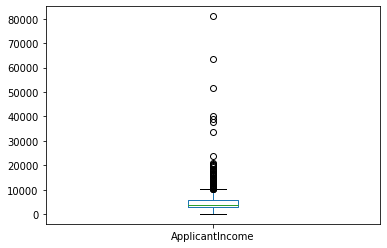

In [38]:
df['ApplicantIncome'].plot.box()

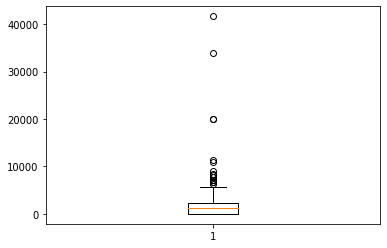

In [39]:
plt.boxplot(df['CoapplicantIncome'])
plt.show()

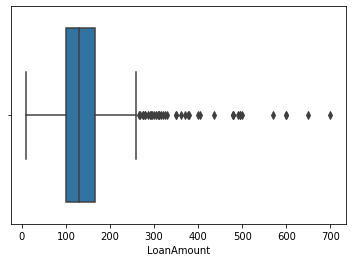

In [40]:
sns.boxplot(df['LoanAmount'])
plt.show()

In [41]:
# we can clerly see that there is many OUTLIERS present in this dataset and to remove the Outliers we have to use ZSCORE

In [43]:
from scipy.stats import zscore

In [44]:
z=np.abs(zscore(df))
z

array([[0.47234264, 0.47234264, 0.73780632, ..., 0.45164045, 1.22329839,
        0.67451931],
       [0.47234264, 0.47234264, 0.25346957, ..., 0.45164045, 1.31851281,
        1.48253724],
       [0.47234264, 0.47234264, 0.73780632, ..., 0.45164045, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.47234264, 0.25346957, ..., 0.45164045, 1.22329839,
        0.67451931],
       [0.47234264, 0.47234264, 1.24474546, ..., 0.45164045, 1.22329839,
        0.67451931],
       [2.11710719, 2.11710719, 0.73780632, ..., 2.41044061, 0.04760721,
        1.48253724]])

In [45]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [46]:
z[9][6]

3.196712546212882

In [47]:
z[604][7]

4.163296162326892

In [48]:
df1=df[(z<3).all(axis=1)]
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [49]:
df.shape

(614, 12)

In [50]:
# there are alomost 37 rows are deleated as outliers

NOW WE NEED TO DECIDE THE TARGET(Y) AND THE INDEPENDENT VARIABLES(X)

In [54]:
x=df1.iloc[:,0:11]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [55]:
y=df1.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

LETS TRAIN THE MODEL AS REQUIRED

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [57]:
max_acc_score=0
for r_state in range(10,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=r_state)
    logr=LogisticRegression()
    logr.fit(x_train,y_train)
    predlogr=logr.predict(x_test)
    accscore=accuracy_score(y_test,predlogr)
    if(accscore>max_acc_score):
        max_acc_score=accscore
        final_r_state=r_state
print('')
print('The max accuracy score corresponing to the',final_r_state,'is',max_acc_score)


The max accuracy score corresponing to the 12 is 0.9051724137931034


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=12)

In [59]:
logr.fit(x_train,y_train)
logr.score(x_train,y_train)

0.7960954446854663

In [60]:
predlogr=logr.predict(x_test)

In [61]:
print('Accuracy Score=',accuracy_score(y_test,predlogr))
print(confusion_matrix(y_test,predlogr))
print(classification_report(y_test,predlogr))

Accuracy Score= 0.9051724137931034
[[17 10]
 [ 1 88]]
              precision    recall  f1-score   support

           0       0.94      0.63      0.76        27
           1       0.90      0.99      0.94        89

    accuracy                           0.91       116
   macro avg       0.92      0.81      0.85       116
weighted avg       0.91      0.91      0.90       116



CROSS VALIDATION

In [62]:
from sklearn.model_selection import cross_val_score

In [65]:
logr=LogisticRegression()
logrscores=cross_val_score(logr,x,y,cv=10)
print('SCORES=',logrscores)
print('Mean & STD:',logrscores.mean(),logrscores.std())

SCORES= [0.81034483 0.81034483 0.81034483 0.77586207 0.77586207 0.79310345
 0.87931034 0.85964912 0.77192982 0.87719298]
Mean & STD: 0.8163944343617665 0.03929497854156662
